# Rethinking the population pyramid


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

age_gender_data = pd.read_csv('https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/us-age-gender-breakdown.csv')
age_gender_data.head()

,Age_Range,Total_Pop_2010,Males_2010,Females_2010
0,<5,20201362,10319427,9881935
1,5-9,20348657,10389638,9959019
2,10-14,20677194,10579862,10097332
3,15-19,22040343,11303666,10736677
4,20-24,21585999,11014176,10571823


# Problems with the population pyramid

1) Violates the [standard expectation](http://mathbench.umd.edu/modules/visualization_graph/page02.htm) of having the causal variable on the x-axis.

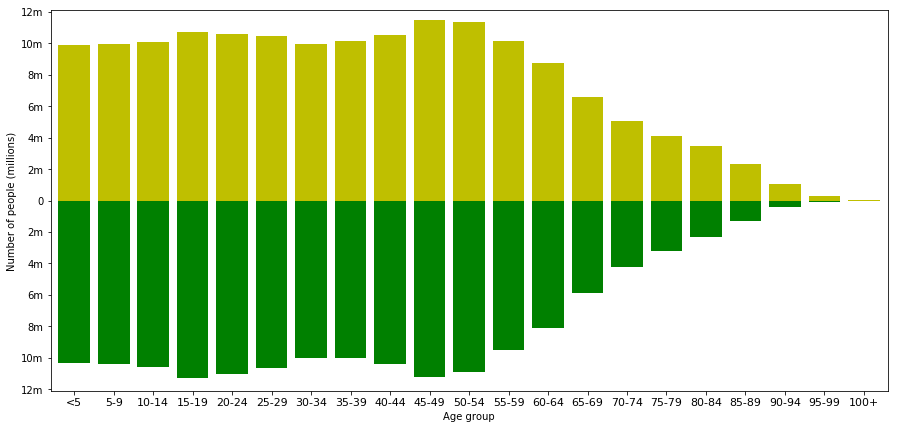

In [2]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in age_gender_data.iterrows():
    plt.bar([i, i], [row['Females_2010'], -row['Males_2010']],
            color=['y', 'g'], width=0.8, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.ylim(-12.1e6, 12.1e6)
#plt.grid(False, axis='x')
plt.xticks(np.arange(0, 21), age_gender_data['Age_Range'], fontsize=11)
plt.yticks(np.arange(-12e6, 13e6, 2e6),
           ['{}m'.format(int(abs(x) / 1e6)) if x != 0 else 0 for x in np.arange(-12e6, 13e6, 2e6)])
plt.xlabel('Age group')
plt.ylabel('Number of people (millions)')

2) Doesn't allow direct comparisons between the two categories.

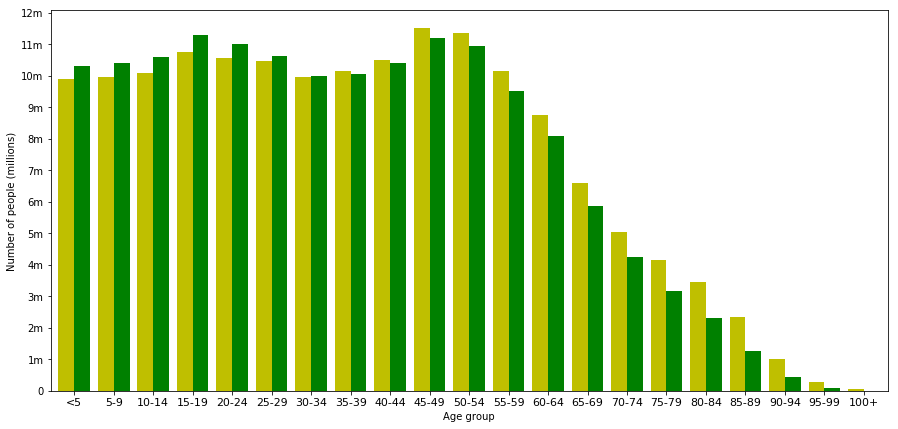

In [3]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in age_gender_data.iterrows():
    plt.bar([i - 0.2, i + 0.2], [row['Females_2010'], row['Males_2010']],
            color=['y', 'g'], width=0.4, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.xticks(range(0, 21), age_gender_data['Age_Range'], fontsize=11)
plt.grid(False, axis='x')
plt.yticks(np.arange(0, 13e6, 1e6),
           ['{}m'.format(int(x / 1e6)) if x > 0 else 0 for x in np.arange(0, 13e6, 1e6)])
plt.xlabel('Age group')
plt.ylabel('Number of people (millions)')

3) Relative trends between the categories can be masked by displaying absolute values.

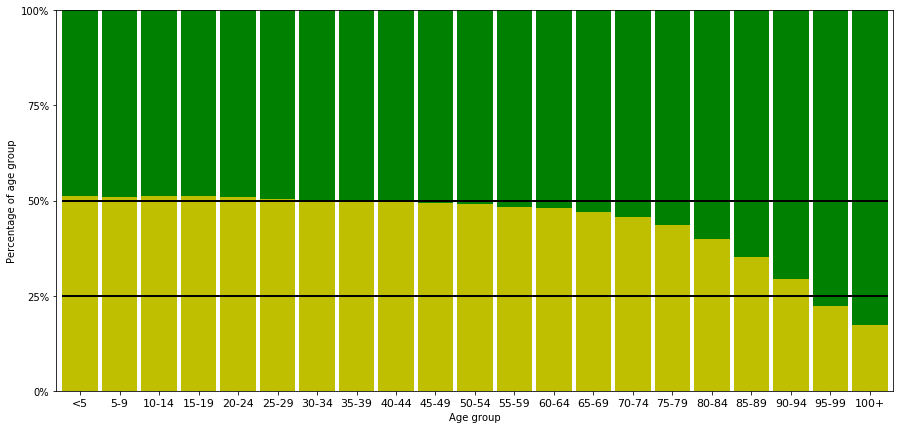

In [4]:
age_gender_data['Male_Pct'] = age_gender_data['Males_2010'] / age_gender_data['Total_Pop_2010']
age_gender_data['Female_Pct'] = age_gender_data['Females_2010'] / age_gender_data['Total_Pop_2010']

plt.figure(figsize=(15, 7))

for (i, row) in age_gender_data.iterrows():
    plt.bar([i], [row['Male_Pct']],
            color=['y'], width=0.9, align='center', edgecolor='none')
    plt.bar([i], [row['Female_Pct']], bottom=[row['Male_Pct']],
            color=['g'], width=0.9, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.ylim(0, 1)
plt.xticks(range(0, 21), age_gender_data['Age_Range'], fontsize=11)
plt.grid(False)
plt.yticks(np.arange(0, 1.01, 0.25),
           ['{}%'.format(int(x * 100)) for x in np.arange(0, 1.01, 0.25)])
plt.xlabel('Age group')
plt.ylabel('Percentage of age group')

plt.plot([-0.425, 20.425], [0.5, 0.5], lw=2, color='black')
plt.plot([-0.425, 20.425], [0.25, 0.25], lw=2, color='black')